In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt

In [4]:
#Load the data
df = pd.read_csv("Sales Dataset.csv")

In [6]:
#Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Order Date'])

In [7]:
#Create Total Sales column
df['Total_Sales'] = df['Quantity'] * df['Price']

In [12]:
#Aggregate monthly sales using Year-Month column
monthly_sales = df.groupby("Year-Month")["Total_Sales"].sum()

In [13]:
#Convert Year-Month to datetime index
monthly_sales.index = pd.to_datetime(monthly_sales.index)

In [14]:
#Sort chronologically
monthly_sales = monthly_sales.sort_index()

In [23]:
#Train Holt Linear Trend Model
model = Holt(monthly_sales).fit()
forecast = model.forecast(1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


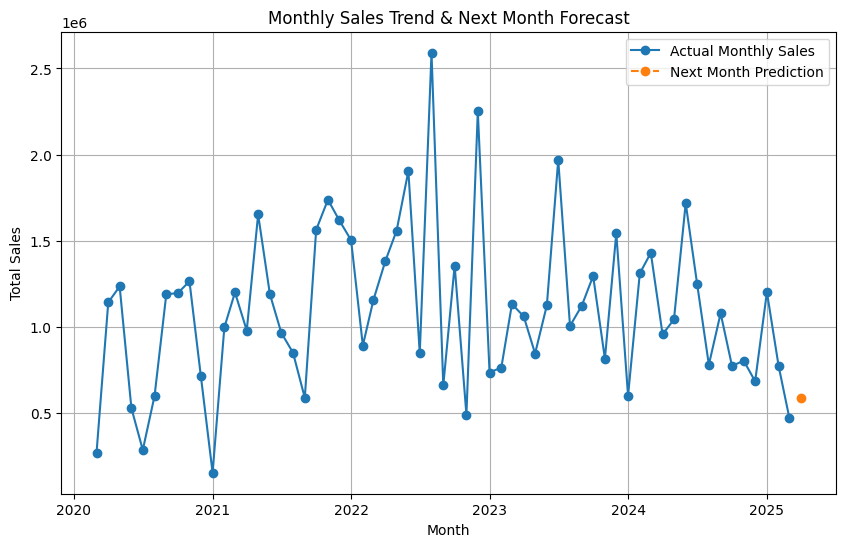

In [24]:
#Plot monthly sales + forecast
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index, monthly_sales, marker="o", label="Actual Monthly Sales")
plt.plot(forecast.index, forecast, marker="o", linestyle="--", label="Next Month Prediction")
plt.title("Monthly Sales Trend & Next Month Forecast")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.legend()
plt.show()

In [25]:
#Print result
print("Next Month Sales Prediction:")
print(forecast)

Next Month Sales Prediction:
2025-04-01    591122.108276
Freq: MS, dtype: float64
